**Nama: Riski Abdi Rahmawan**

**Kelas: TI-3E**

**Absen: 25**

# Praktikum 1 Klasifikasi Iris dengan Perceptron

**Langkah 1 - Import Library**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

**Langkah 2 - Load Data dan Visualisasi**

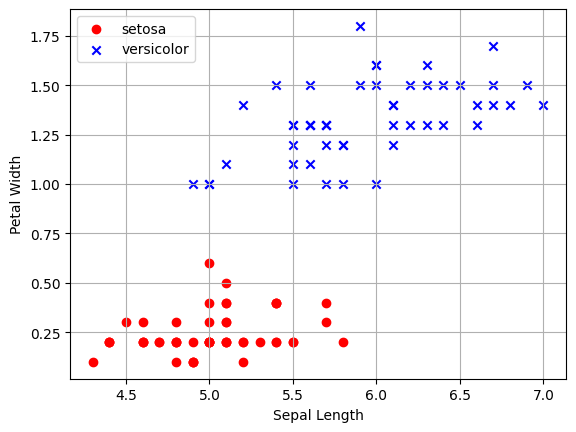

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca file CSV dengan header
df = pd.read_csv('/content/drive/MyDrive/Machine Learning/assets/iris.csv')

# Filter spesies
setosa = df[df['Species'] == 'Iris-setosa']
versicolor = df[df['Species'] == 'Iris-versicolor']
virginica = df[df['Species'] == 'Iris-virginica']

# Menentukan kolom untuk scatter plot (a=0 untuk ID, b=3 untuk Petal Width)
a, b = 'SepalLengthCm', 'PetalWidthCm'

# Scatter plot
plt.scatter(setosa[a], setosa[b], color='red', marker='o', label='setosa')
plt.scatter(versicolor[a], versicolor[b], color='blue', marker='x', label='versicolor')

# Menambahkan label sumbu
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')

# Menambahkan legenda
plt.legend(loc='upper left')

# Menambahkan grid
plt.grid()

# Menampilkan plot
plt.show()

**Langkah 3 - Membuat Kelas Perceptron**

In [3]:
import numpy as np

class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        """
        eta: learning rate (antara 0.0 dan 1.0)
        n_iter: jumlah epoch (iterasi data pelatihan)
        """
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """
        Melatih model menggunakan dataset X dan target y.
        X: Data pelatihan (array [n_samples, n_features])
        y: Target (array [n_samples])
        """
        # Inisialisasi bobot dengan nilai nol, termasuk bias
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        # Proses pelatihan
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))  # Hitung pembaruan bobot
                self.w_[0] += update  # Pembaruan bias (w0)
                self.w_[1:] += update * xi  # Pembaruan bobot fitur
                errors += int(update != 0.0)  # Hitung kesalahan jika ada pembaruan
            self.errors_.append(errors)  # Simpan kesalahan per epoch
        return self

    def net_input(self, X):
        """Hitung input bersih: perkalian dot antara fitur dan bobot."""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Kembalikan label kelas setelah aktivasi unit step."""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

**Langkah 4 - Pilih Data dan Encoding Label**

In [4]:
X = df.iloc[0:100, [1, 4]].values  # SepalLengthCm, PetalLengthCm
y = df.iloc[0:100, 5].values

# Mengkonversi label target ke bentuk numerik (-1 untuk setosa, 1 untuk versicolor)
y = np.where(y == 'Iris-setosa', -1, 1)

**Langkah 5 - Fitting Model**

In [5]:
# Cell 5: Inisialisasi dan training model
ppn = Perceptron(eta=0.1, n_iter=10)  # Inisialisasi model Perceptron
ppn.fit(X, y)  # Melatih model dengan data X dan label y

**Langkah 6 - Visualisasi Nilai Error Per Epoch**

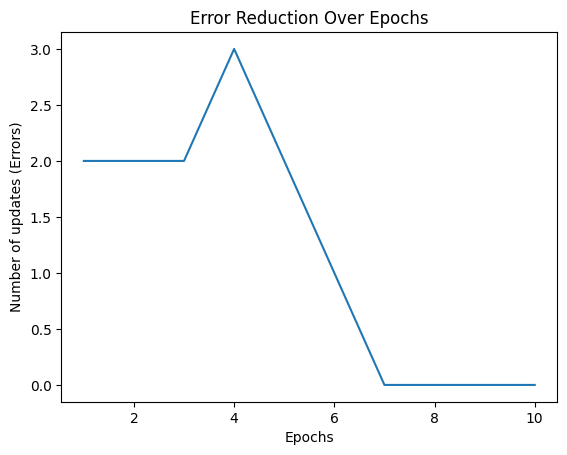

In [6]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_)
plt.xlabel('Epochs')
plt.ylabel('Number of updates (Errors)')
plt.title('Error Reduction Over Epochs')
plt.show()

**Langkah 7 - Visualiasasi Decision Boundary**

<ipython-input-7-5648f8f15613>:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)


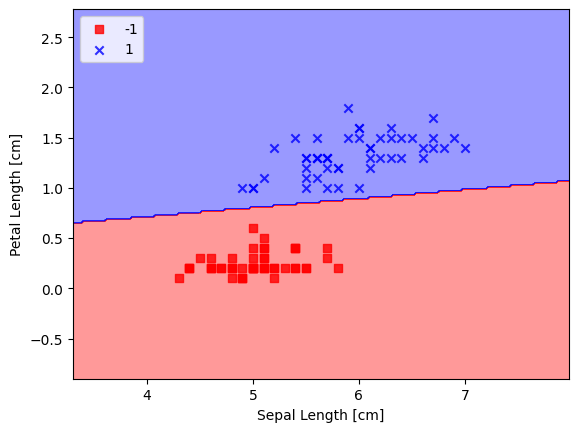

In [7]:
# buat fungsi untuk plot decision region

from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('r', 'b', 'g', 'k', 'grey')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision regions by creating a pair of grid arrays xx1 and xx2 via meshgrid function in Numpy
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    # use predict method to predict the class labels z of the grid points
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    # draw the contour using matplotlib
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for i, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1], alpha=0.8, c=cmap(i), marker=markers[i], label=cl)

plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Sepal Length [cm]')
plt.ylabel('Petal Length [cm]')
plt.legend(loc='upper left')
plt.show()

# Praktikum 2 Klasifikasi Berita dengan Perceptron

**Langkah 1 - Import Library**

In [8]:
from sklearn.datasets import fetch_20newsgroups # download dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
from sklearn.metrics import f1_score, classification_report

**Langkah 2 - Pilih Label dan Split Data**

In [9]:
categories = ['rec.sport.hockey', 'rec.sport.baseball', 'rec.autos']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'))

**Langkah 3 - Ekstrak Fitur dan Buat Model Perceptron Copy**

In [10]:
# Ekstrak Fitur
vectorizer = TfidfVectorizer()

# Fit fitur
X_train = vectorizer.fit_transform(newsgroups_train.data)
X_test = vectorizer.transform(newsgroups_test.data)

# Fit Model
clf = Perceptron(random_state=11)
clf.fit(X_train, newsgroups_train.target)

# Prediksi
predictions = clf.predict(X_test)
print(classification_report(newsgroups_test.target, predictions))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       396
           1       0.82      0.83      0.83       397
           2       0.88      0.87      0.87       399

    accuracy                           0.86      1192
   macro avg       0.86      0.86      0.86      1192
weighted avg       0.86      0.86      0.86      1192



# Praktikum 3 Nilai Logika XOR dengan MLP

**Langkah 1 - Import Library**

In [11]:
from sklearn.neural_network import MLPClassifier

**Langah 2 - Buat Data**

In [12]:
y = [0, 1, 1, 0] # label
X = [[0, 0], [0, 1], [1, 0], [1, 1]] # data

**Langkah 3 - Fit Model**

In [13]:
# Fit model
clf = MLPClassifier(solver='lbfgs', activation='logistic', hidden_layer_sizes=(2,), max_iter=100, random_state=20)
clf.fit(X, y)

MLPClassifier(activation='logistic', hidden_layer_sizes=(2,), max_iter=100,
              random_state=20, solver='lbfgs')

**Langkah 4 - Prediksi**

In [14]:
pred = clf.predict(X)
print('Accuracy: %s' % clf.score(X, y))
for i,p in enumerate(pred[:10]):
    print('True: %s, Predicted: %s' % (y[i], p))

Accuracy: 1.0
True: 0, Predicted: 0
True: 1, Predicted: 1
True: 1, Predicted: 1
True: 0, Predicted: 0


# Praktikum 4 Klasifikasi dengan ANN

In [15]:
pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 14.3 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


##Pra Pengolahan Data

**Langkah 1 - Import Library**

In [16]:
import numpy as np
import pandas as pd
import tensorflow as tf

**Langkah 2 - Load Data**

In [17]:
dataset = pd.read_csv('/content/drive/MyDrive/Machine Learning/assets/Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

**Cek data (X)**

In [18]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


**Langkah 3 - Encoding Data Kategorikal**

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

**Cek data (X) dengan print. Hasilnya,**

In [20]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


**Langkah 4 - Encoding Kolom "Geography" dengan One Hot Encoder**

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

**Cek data (X) dengan print. Hasilnya,**

In [22]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


**Langkah 5 - Split Data**

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**Langkah 6 - Scaling Fitur**

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Membuat Model ANN

**Langkah 1 - Inisiasi Model ANN**

In [25]:
ann = tf.keras.models.Sequential()

**Langkah 2 - Membuat Input Layer dan Hidden Layer Pertama**

In [26]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

**Langkah 3 - Membuat Hidden Layer Kedua**

In [27]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

**Langkah 4 - Membuat Output Layer**

In [28]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

##Training Model

**Langkah 1 - Compile Model (Menyatukan Arsitektur) ANN**

In [29]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

**Langkah 2 - Fitting Model**

In [30]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.5749 - loss: 0.6776
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7918 - loss: 0.5041
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8038 - loss: 0.4502
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7980 - loss: 0.4352
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8035 - loss: 0.4288
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7998 - loss: 0.4201
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7943 - loss: 0.4294
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8060 - loss: 0.4093
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8058 - loss: 0.4085
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8074 - loss: 0.4050
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8068 - loss: 0.4002
Epoch 12/100
250/250 ━━━━━━━━━━━━━━━━━━━━

##Membuat Prediksi

**Modelkan Data Baru dan Buat Prediksi**

In [31]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
[[False]]


**Prediksi Dengan Data Testing**

In [32]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


**Cek Akurasi dan Confusion Matrix**

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[1510   85]
 [ 195  210]]


0.86

# Tugas

1. Lakukan klasifikasi pada data MNIST dengan menggunakan model ANN

2. Anda diperbolehkan melakukan eksplorasi terhadap,
    
  *   Metode pra pengolahan
  *   Pemilihan fitur
  *   Arsitektur ANN
  *   Fungsi Aktiviasi

3. ANN diimplementasikan dengan menggunakan tensorflow.

4. DIKERJAKAN SECARA BERKELOMPOK

5. JELASKAN HASIL YANG ANDA DAPATKAN,

    *   AKURASI
    *   CONFUSION MATRIX
    *   KONFIGURASI MODEL --> MULAI DARI PRA PENGOLAHAN SAMPAI ARSITEKTUR ANN

**Import Library**

In [42]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist

**Load Dataset MINST**

In [43]:
# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

**Pra Pengolahan**

In [44]:
# Pra-pengolahan
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalisasi
x_train = x_train.reshape(-1, 784)  # Ubah bentuk menjadi vektor
x_test = x_test.reshape(-1, 784)

**Membangun Arsitektur Model**

In [45]:
# Membangun arsitektur model
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Kompilasi Model**

In [46]:
# Kompilasi model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

**Pelatihan Model**

In [47]:
# Pelatihan model
history = model.fit(x_train, y_train, epochs=15, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8577 - loss: 0.4947 - val_accuracy: 0.9536 - val_loss: 0.1434
Epoch 2/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9654 - loss: 0.1157 - val_accuracy: 0.9693 - val_loss: 0.0999
Epoch 3/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9770 - loss: 0.0773 - val_accuracy: 0.9723 - val_loss: 0.0967
Epoch 4/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9830 - loss: 0.0542 - val_accuracy: 0.9706 - val_loss: 0.0950
Epoch 5/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9873 - loss: 0.0416 - val_accuracy: 0.9758 - val_loss: 0.0866
Epoch 6/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9901 - loss: 0.0324 - val_accuracy: 0.9756 - val_loss: 0.0796
Epoch 7/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9916 - loss: 0.0260 - val_accuracy: 0.9750 - val_loss: 0.0858
Epoch 8/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.9927 - loss: 0.0231 - val_accuracy: 0.

**Evaluasi Model**

In [48]:
# Evaluasi model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9712 - loss: 0.1279
Test Accuracy: 0.9765999913215637


**Prediksi dan Confusion Matrix**

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


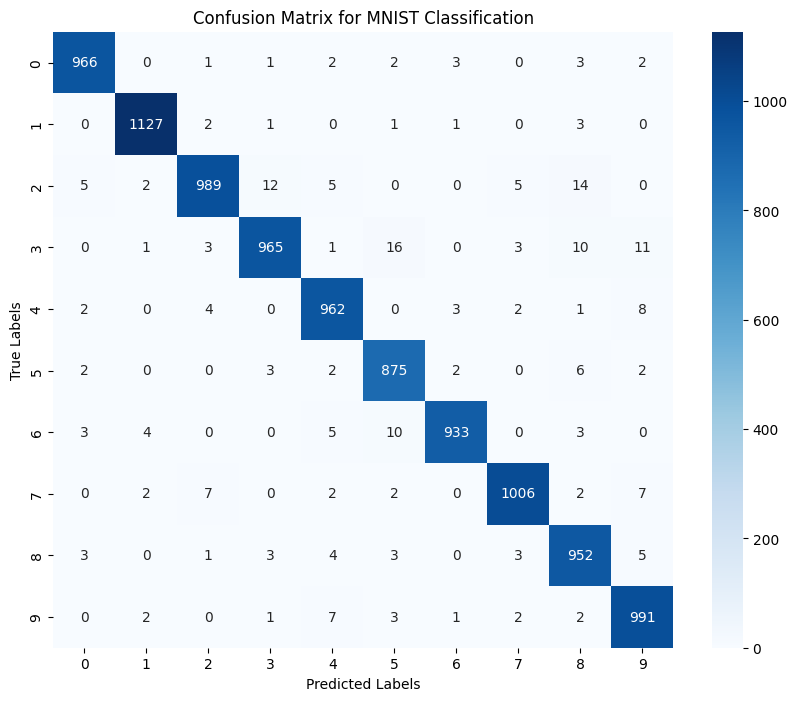

In [49]:
# Prediksi dan Confusion Matrix
y_pred = np.argmax(model.predict(x_test), axis=1)
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualisasi Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for MNIST Classification')
plt.show()

**Hasil**

1. Akurasi: Model menunjukkan seberapa baik model ANN dalam mengklasifikasikan gambar angka dari dataset MNIST. Akurasi diukur berdasarkan persentase prediksi benar dari total data uji. Model ANN sederhana ini biasanya dapat mencapai akurasi antara 96-98% pada dataset MNIST. Hasil ini berarti model mampu mengenali sebagian besar gambar angka dengan benar, meskipun mungkin ada sedikit kesalahan pada angka yang tampak mirip satu sama lain (misalnya, angka 5 dan 3 atau angka 9 dan 4).
2. Confusion Matrix: Memberikan pandangan lebih rinci tentang performa model dengan menampilkan jumlah prediksi benar dan salah untuk setiap kelas (angka 0-9). Matrix ini berbentuk tabel 10x10, di mana tiap baris mewakili label sebenarnya, dan setiap kolom mewakili prediksi model. Angka pada diagonal menunjukkan jumlah prediksi yang benar untuk masing-masing kelas, sementara angka di luar diagonal menunjukkan kesalahan klasifikasi (misalnya, jika model memprediksi angka 3 ketika angka sebenarnya adalah 5). Dengan menganalisis confusion matrix, kita dapat mengidentifikasi angka-angka yang lebih sering diklasifikasikan dengan salah dan memahami pola kesalahan model.
3. Konfigurasi Model: Dari Pra-pengolahan hingga Arsitektur ANN:

  * Pra-pengolahan Data

    1. Normalisasi: Semua nilai piksel gambar, yang semula berada dalam rentang 0-255, dinormalisasi menjadi rentang 0-1 dengan membaginya dengan 255. Langkah ini membantu stabilitas pelatihan dan mempercepat konvergensi model.
    2. Pembagian Data: Dataset MNIST dibagi menjadi data pelatihan dan data pengujian. Data pelatihan digunakan untuk melatih model, sedangkan data pengujian untuk mengukur performa model.
    3. Reshape Gambar: Setiap gambar berukuran 28x28 piksel diubah menjadi vektor 1 dimensi dengan panjang 784, sehingga bisa digunakan sebagai input dalam model ANN.
  * Arsitektur Model ANN

    1. Input Layer: Terdiri dari 784 neuron, satu untuk setiap piksel dari gambar yang diratakan.
    2. Hidden Layers: Model ini menggunakan dua lapisan tersembunyi dengan fungsi aktivasi ReLU. Lapisan pertama memiliki 128 neuron, sementara lapisan kedua memiliki 64 neuron. Fungsi aktivasi ReLU diterapkan untuk menambahkan non-linearitas dan mempercepat pelatihan.
    3. Output Layer: Menggunakan 10 neuron (satu untuk setiap kelas angka dari 0 hingga 9) dengan fungsi aktivasi softmax, yang mengubah output menjadi probabilitas dari setiap kelas.
  * Kompilasi dan Pelatihan Model

    1. Fungsi Loss: SparseCategoricalCrossentropy, yang cocok untuk masalah klasifikasi multi-kelas.
    2. Optimizer: Adam, yang secara adaptif menyesuaikan learning rate untuk meningkatkan efisiensi pelatihan.
    3. Metrics: Accuracy, digunakan untuk mengukur akurasi model selama pelatihan dan evaluasi. Epochs dan Batch Size: Model dilatih selama 10-20 epoch dengan batch size 64.